In [2]:
import tensorflow as tf
from tensorboard import program

log_dir = "D:\Cursos\REPOSITORIOS\DATASET\malware_total\logs"
tb=program.TensorBoard()
tb.configure(argv=[None, '--logdir', log_dir])
url = tb.launch() #  lanza TensorBoard en el navegador

# Configurar la GPU antes de inicializar TensorFlow
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)
print(physical_devices)

# Configurar la GPU para sea mas eficiente en el uso de memoria tensorflow
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)



[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
import os
import tensorboard_
os.environ['TENSORBOARD_BINARY'] = '/home/vicevil/miniconda3/pkgs/tensorboard-2.10.0-py37h06a4308_0/lib/python3.7/site-packages/tensorboard'  

#import tensorboard

# Definir el directorio de registro para TensorBoard(ensorBoard es una herramienta esencial para entender, depurar y optimizar los modelos de TensorFlow.)
log_dir = r"D:\Cursos\REPOSITORIOS\DATASET\malware_total\logs"

# Configurar TensorBoard
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True, write_images=True, )

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import funciones_ML as bt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder, Normalizer
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay,classification_report,r2_score,RocCurveDisplay,confusion_matrix, accuracy_score,recall_score,f1_score,precision_score,precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, SGDClassifier, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.pipeline import Pipeline
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.regularizers import l2, l1, l1_l2
from sklearn.cluster import KMeans
from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras import regularizers
from sklearn.compose import ColumnTransformer
from tensorflow.keras.losses import CategoricalCrossentropy, sparse_categorical_crossentropy, binary_crossentropy
#import networkx as nx
from tensorflow.keras.layers import Activation
from tensorflow.keras.callbacks import ReduceLROnPlateau




# Configurar pandas para mostrar todas las filas y columnas
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


# Código para los tamaños de las fuentes y los "ticks" de los ejes:
plt.rc('font', size=6)
plt.rc('axes', labelsize=10, titlesize=10)
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# INTRODUCCION

Este dataset es la concatenación de 12 dataset donde se muestra datos tecnicos y concretos sobre ataques malware. La idea del presente trabajo es analizar la gran cantidad de datos para establecer un modelo de red neuronal que pueda prevenir los ataques malware idintificados como "benign o malicious" e ir alimentandolo en un futuro con nuevos datos. EL dataset, despues de las uniones y primeros tratamientos, cuenta con 23 columnas y 25.011.003 millones de registros por cada columna.

# CARGA DATASET

windows

In [5]:
df=pd.read_csv(r"D:\Cursos\REPOSITORIOS\DATASET\malware_total\df_malware_origen.csv")

## 1. TRATAMIENTO DE DATOS 2 - EDA

In [4]:
df

,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,anyo,mes,dia,hora
0,51524.0,65.127.233.163,23.0,tcp,S0,0.0,S,3.0,180.0,0.0,0.0,Malicious,2018,5,9,15
1,56305.0,63.150.16.171,23.0,tcp,S0,0.0,S,1.0,60.0,0.0,0.0,Malicious,2018,5,9,15
2,41101.0,111.40.23.49,23.0,tcp,S0,0.0,S,1.0,60.0,0.0,0.0,Malicious,2018,5,9,15
3,60905.0,131.174.215.147,23.0,tcp,S0,0.0,S,3.0,180.0,0.0,0.0,Malicious,2018,5,9,15
4,44301.0,91.42.47.63,23.0,tcp,S0,0.0,S,1.0,60.0,0.0,0.0,Malicious,2018,5,9,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25010998,123.0,89.221.210.188,123.0,udp,SF,0.0,Dd,2.0,152.0,2.0,152.0,Benign,2019,9,21,0
25010999,37306.0,102.165.48.81,17769.0,tcp,S1,0.0,ShAdDaT,8952.0,483602.0,9613.0,520116.0,Malicious C&C,2019,9,20,1
25011000,123.0,212.111.30.190,123.0,udp,SF,0.0,Dd,2.0,152.0,2.0,152.0,Benign,2019,9,21,0
25011001,123.0,5.1.56.123,123.0,udp,SF,0.0,Dd,2.0,152.0,2.0,152.0,Benign,2019,9,21,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25011003 entries, 0 to 25011002
Data columns (total 16 columns):
 #   Column         Dtype  
---  ------         -----  
 0   id.orig_p      float64
 1   id.resp_h      object 
 2   id.resp_p      float64
 3   proto          object 
 4   conn_state     object 
 5   missed_bytes   float64
 6   history        object 
 7   orig_pkts      float64
 8   orig_ip_bytes  float64
 9   resp_pkts      float64
 10  resp_ip_bytes  float64
 11  label          object 
 12  anyo           int64  
 13  mes            int64  
 14  dia            int64  
 15  hora           int64  
dtypes: float64(7), int64(4), object(5)
memory usage: 3.0+ GB


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id.orig_p,25011003.0,39909.621653,16091.971588,0.0,32980.0,42993.0,52360.0,6.553500e+04
id.resp_p,25011003.0,9710.505869,22174.483979,0.0,23.0,23.0,81.0,6.553500e+04
missed_bytes,25011003.0,76.328378,381679.912860,0.0,0.0,0.0,0.0,1.908819e+09
orig_pkts,25011003.0,13.503795,17511.696998,0.0,1.0,1.0,3.0,6.602735e+07
orig_ip_bytes,25011003.0,590.018830,687810.320026,0.0,40.0,60.0,180.0,1.914793e+09
resp_pkts,25011003.0,0.014653,4.189365,0.0,0.0,0.0,0.0,9.613000e+03
resp_ip_bytes,25011003.0,1.754076,376.195477,0.0,0.0,0.0,0.0,5.201160e+05
anyo,25011003.0,2018.279078,0.448546,2018.0,2018.0,2018.0,2019.0,2.019000e+03
mes,25011003.0,8.663813,3.369733,1.0,7.0,9.0,12.0,1.200000e+01
dia,25011003.0,21.311137,5.977596,1.0,21.0,22.0,25.0,3.100000e+01


ESQUEMA DEL DATASET PREVIO

Columna: |	Descripción: |	Tipo: |	Orden de entrada: |	Información posterior a la etiqueta "label"|
-|-|-|-|-|
id.resp_h|	Identificador único del host de destino	|Categórico	 |1	 |No
proto|	Protocolo utilizado (TCP, UDP, ICMP, etc.)|	Categórico|	2|	No
conn_state|	Estado de la conexión (SYN, ACK, FIN, etc.)|	Categórico|	3	|No
orig_pkts|	Número de paquetes enviados por el host de origen|	Numérico|	4|	No
orig_ip_bytes|	Número de bytes enviados por el host de origen|	Numérico|	5|	No
resp_pkts|	Número de paquetes recibidos por el host de destino	|Numérico|	6|	No
resp_ip_bytes|	Número de bytes recibidos por el host de destino|	Numérico|	7|	No
anyo|	Año de la conexión|	Numérico|	8|	No
mes|	Mes de la conexión|	Numérico|	9|	No
dia|	Día de la conexión|	Numérico|	10|	No
hora|	Hora de la conexión|	Numérico|	11|	No
id.resp_p|	Identificador único del puerto de destino|	Categórico|	12|	No
missed_bytes|	Número de bytes perdidos en la conexión	|Numérico|	13|	No
id.orig_p|	Identificador único del puerto de origen|	Categórico|	14|	No
hostory|	conexiones y patrones detectados de conexiones anteriores|	Categórico|	15|	No
label|	Etiqueta que indica si la conexión es normal o anómala|	Categórica	| Target

## ANALISIS DE LA TARGET

LA RENOMBRO

In [28]:
df.rename(columns={"label":"target"}, inplace=True)


<Axes: >

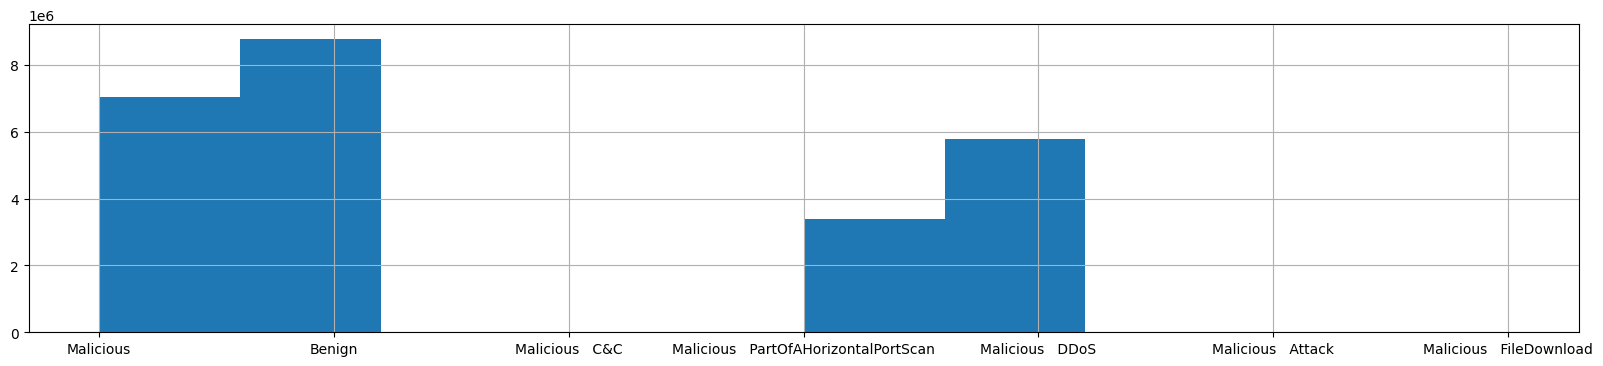

In [10]:
plt.figure(figsize=(20,4))
df.target.hist()

SE PUEDE APRECIAR QUE LOS DISTINTOS VALORES DE LA TARGET DE LA IZQUIERDA DE LA GRAFICA TIENEN EL NOMBRE DE MALICIOUS + OTRA PALABRA

VALORES UNICOS DE LA TARGET

In [22]:
df.target.unique()

array(['Malicious', 'Benign', 'Malicious   C&C',
       'Malicious   PartOfAHorizontalPortScan', 'Malicious   DDoS',
       'Malicious   Attack', 'Malicious   FileDownload'], dtype=object)

CONVERTIMOS LOS VALORES "MALICIOUS + ALGUNA PALABRA" EN "MALICIOUS" PARA QUEDARNOS CON UNA COLUMNA BINARIA

In [11]:
def reemplazar_malicioso(valor):
  if valor in ["Malicious   C&C", "Malicious   PartOfAHorizontalPortScan",
              "Malicious   DDoS", "Malicious   Attack", "Malicious   FileDownload"]:
    return "Malicious"
  else:
    return valor
  

In [12]:
df["Target"] = df["Target"].apply(reemplazar_malicioso)


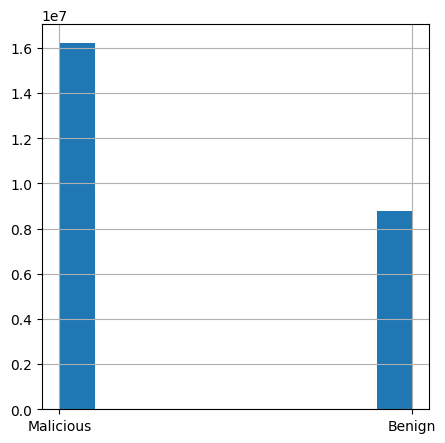

In [16]:
plt.figure(figsize=(5,5))
df.Target.hist(bins=10);

In [17]:
df.Target.value_counts()/len(df)*100

Target
Malicious    64.894818
Benign       35.105182
Name: count, dtype: float64

La target esta desbalanceada

In [31]:
df.drop(columns=["target"], inplace=True)

### GRAFICAMOS LAS  COLUMNAS PARA VISUALIZARLAS

In [32]:
df.columns

Index(['id.orig_p', 'id.resp_h', 'id.resp_p', 'proto', 'conn_state',
       'missed_bytes', 'history', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts',
       'resp_ip_bytes', 'anyo', 'mes', 'dia', 'hora', 'Target'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25011003 entries, 0 to 25011002
Data columns (total 16 columns):
 #   Column         Dtype  
---  ------         -----  
 0   id.orig_p      float64
 1   id.resp_h      object 
 2   id.resp_p      float64
 3   proto          object 
 4   conn_state     object 
 5   missed_bytes   float64
 6   history        object 
 7   orig_pkts      float64
 8   orig_ip_bytes  float64
 9   resp_pkts      float64
 10  resp_ip_bytes  float64
 11  anyo           int64  
 12  mes            int64  
 13  dia            int64  
 14  hora           int64  
 15  Target         object 
dtypes: float64(7), int64(4), object(5)
memory usage: 3.0+ GB


In [34]:
cat= ["history",'proto','conn_state','id.resp_h']
num=[  'missed_bytes', 'id.orig_p','id.resp_p','orig_pkts', 'orig_ip_bytes','resp_pkts', 'resp_ip_bytes', 'anyo', 'mes', 'dia', 'hora']
Target= ['Target']

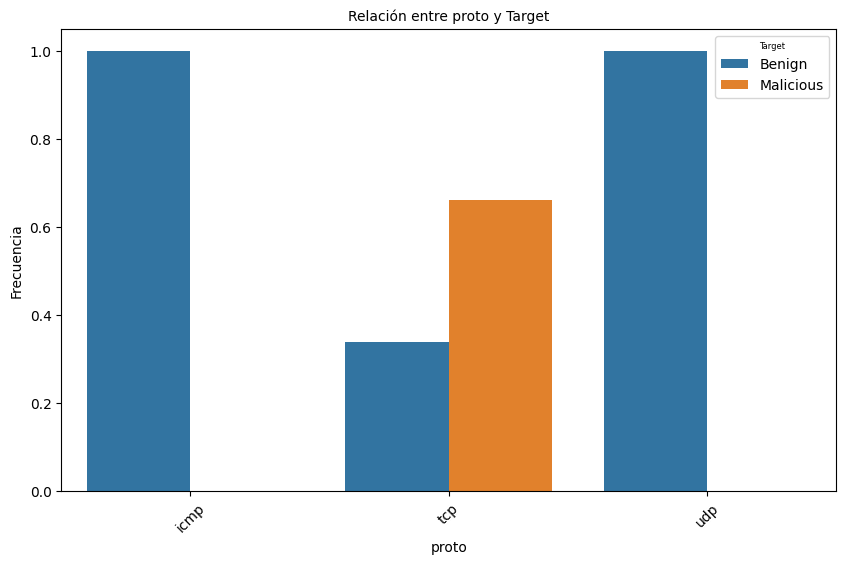

In [20]:
bt.plot_categorical_relationship_fin(df, "proto", "Target", relative_freq=True, show_values=False, size_group = 20)

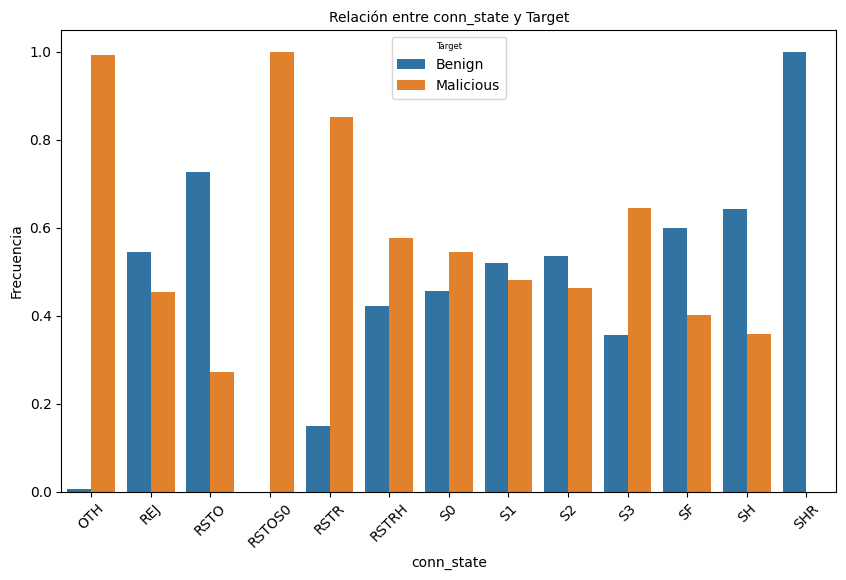

In [21]:
bt.plot_categorical_relationship_fin(df, "conn_state", "Target", relative_freq=True, show_values=False, size_group = 20)

In [33]:
#NO SE GRAFICA LA COLUMNA ID.RESP.H POR TLAS EXCESIVAS GRAFICCAS, PERO ESTA MEZCALDAS, HAY IP QUE SON ARHIVO BUENOS Y OTRAS QUE TRAEN ARCHIVOS MALICIOASOS

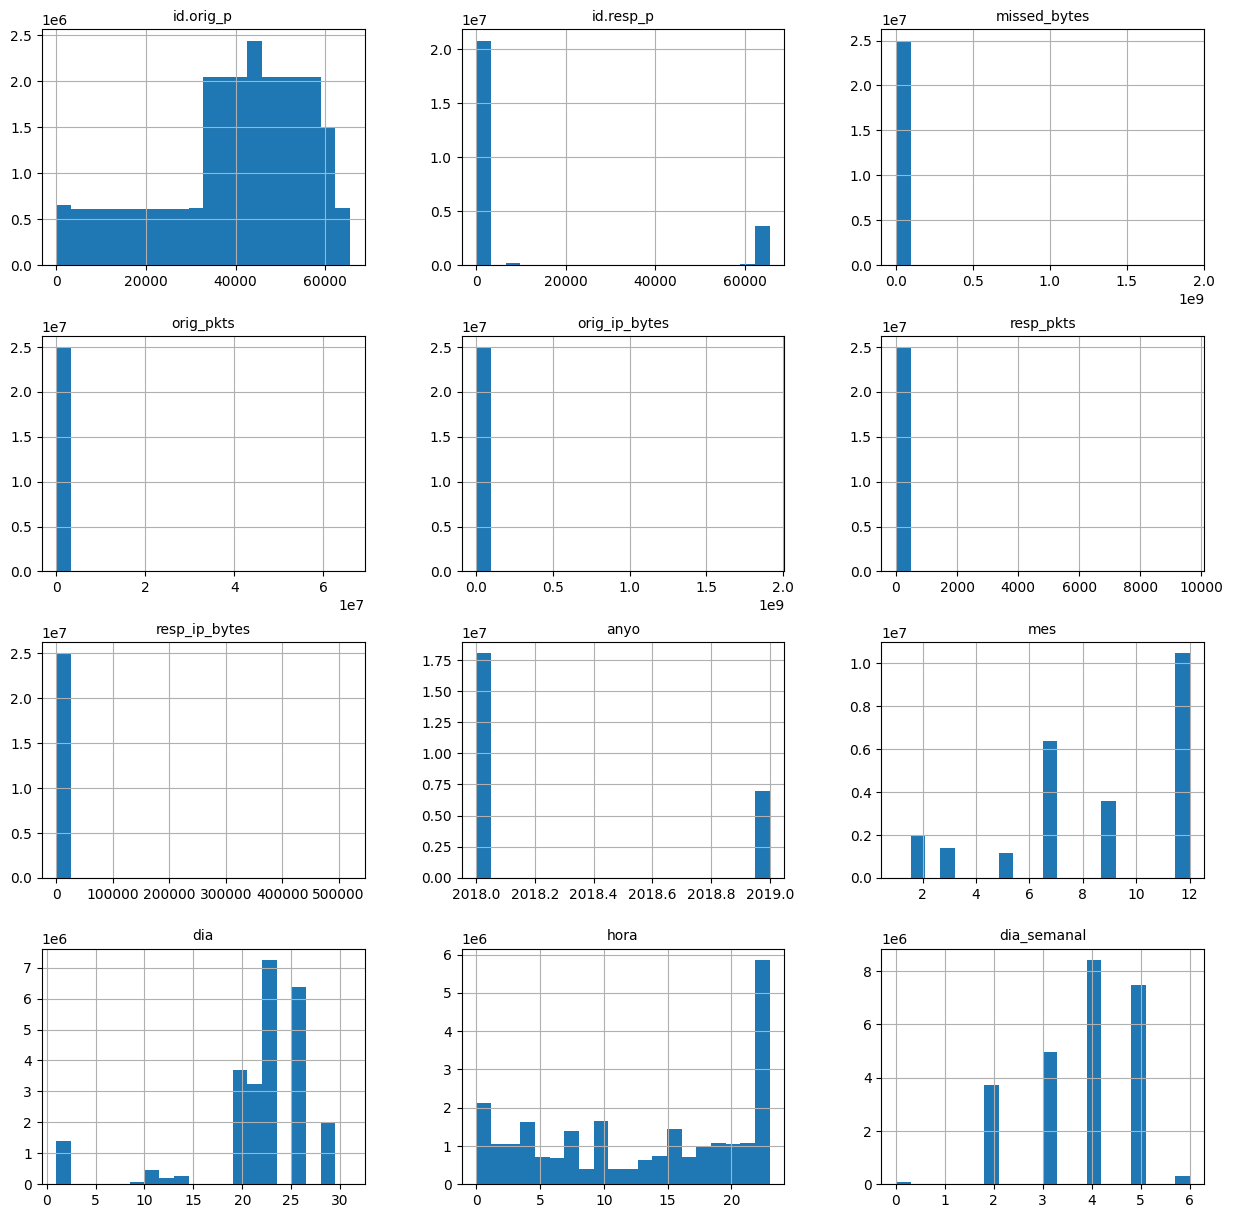

In [34]:
df.hist(figsize=(15,15), bins=20);


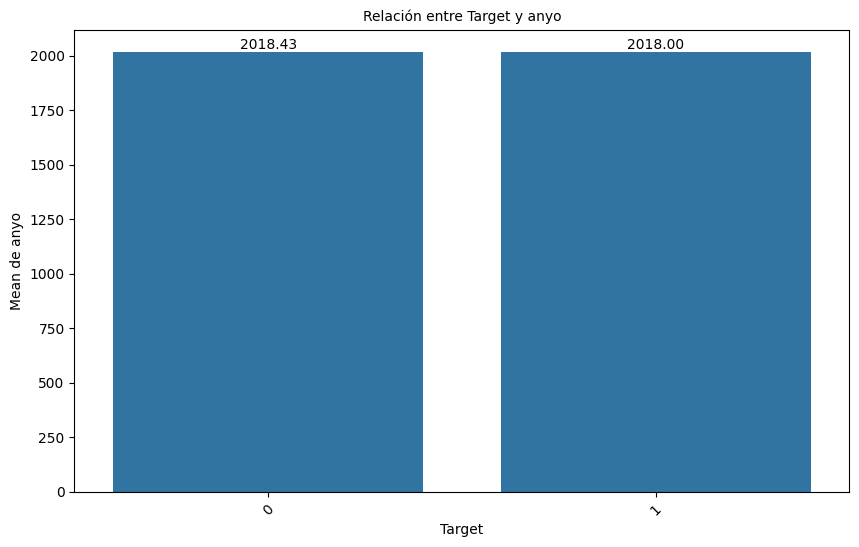

In [6]:
bt.plot_categorical_numerical_relationship(df, "Target", "anyo", show_values=True, measure='mean')

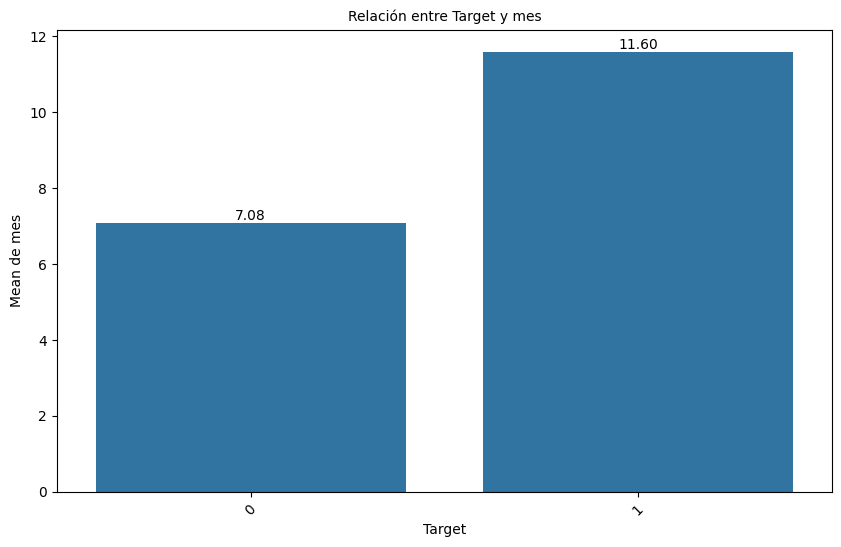

In [7]:
bt.plot_categorical_numerical_relationship(df, "Target", "mes", show_values=True, measure='mean')

![image.png](attachment:image.png)

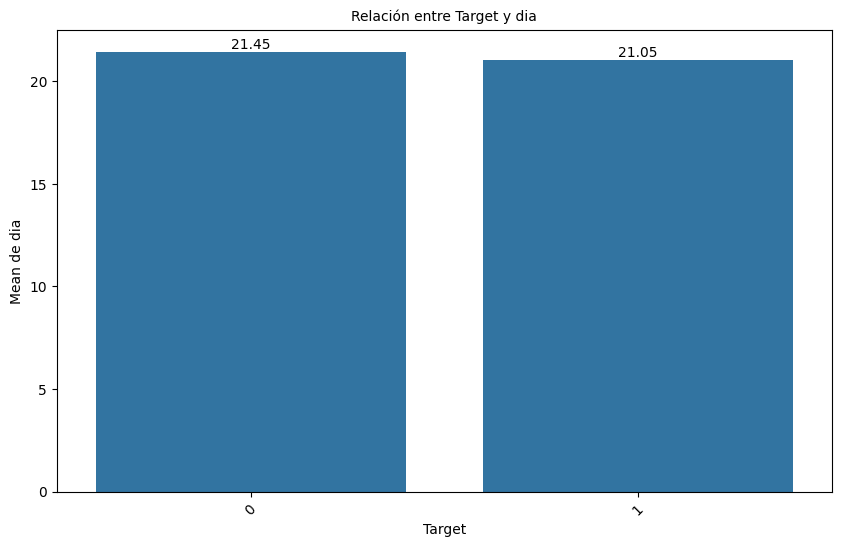

In [8]:
bt.plot_categorical_numerical_relationship(df, "Target", "dia", show_values=True, measure='mean')

![image.png](attachment:image.png)

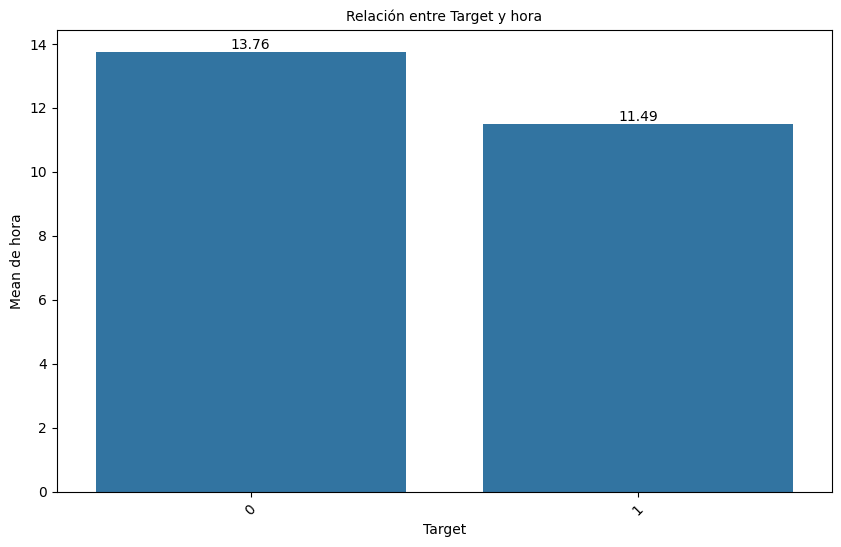

In [9]:
bt.plot_categorical_numerical_relationship(df, "Target", "hora", show_values=True, measure='mean')

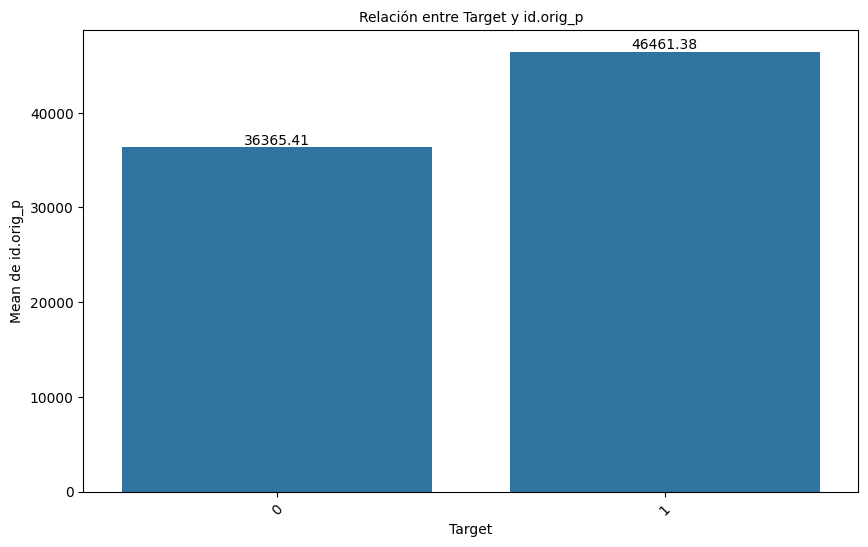

In [14]:
bt.plot_categorical_numerical_relationship(df, "Target", "id.orig_p", show_values=True, measure='mean')

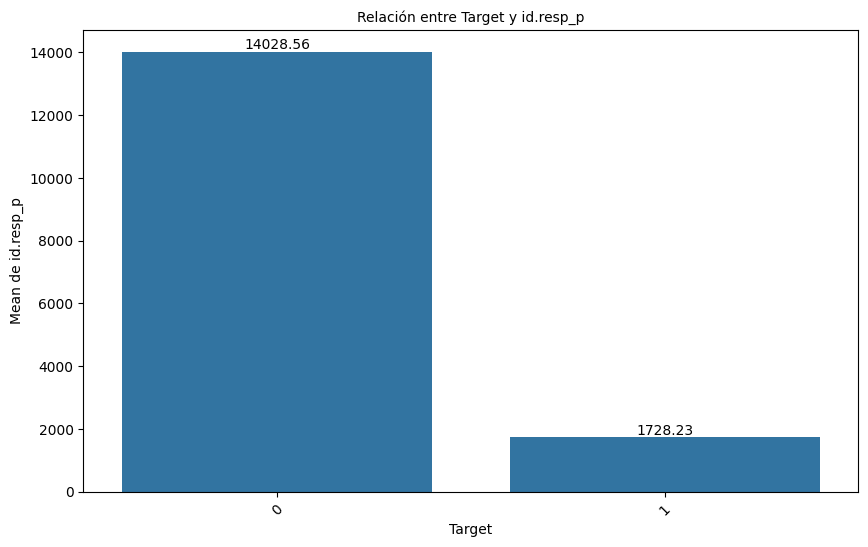

In [15]:
bt.plot_categorical_numerical_relationship(df, "Target", "id.resp_p", show_values=True, measure='mean')

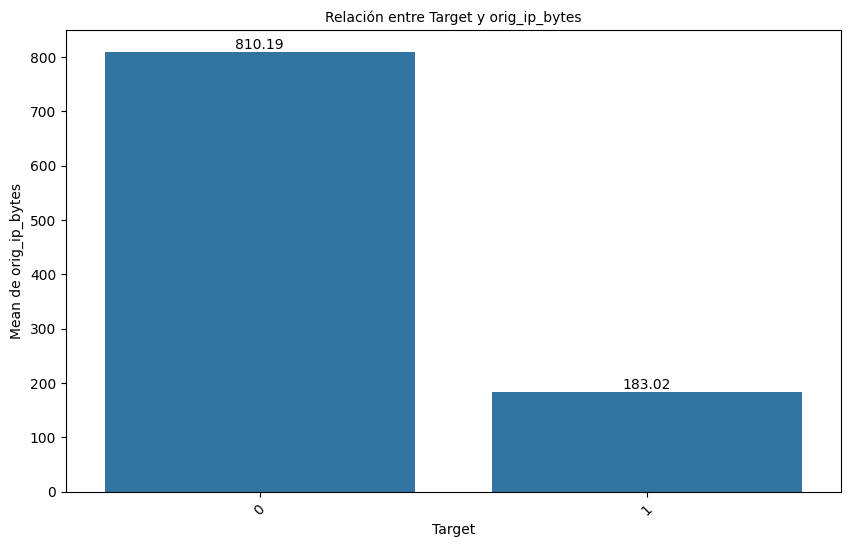

In [16]:
bt.plot_categorical_numerical_relationship(df, "Target", "orig_ip_bytes", show_values=True, measure='mean')

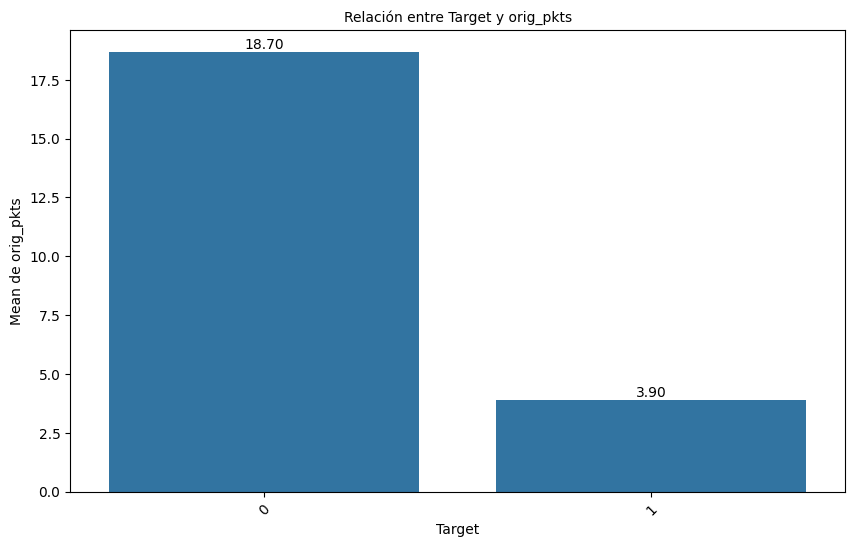

In [17]:
bt.plot_categorical_numerical_relationship(df, "Target", "orig_pkts", show_values=True, measure='mean')

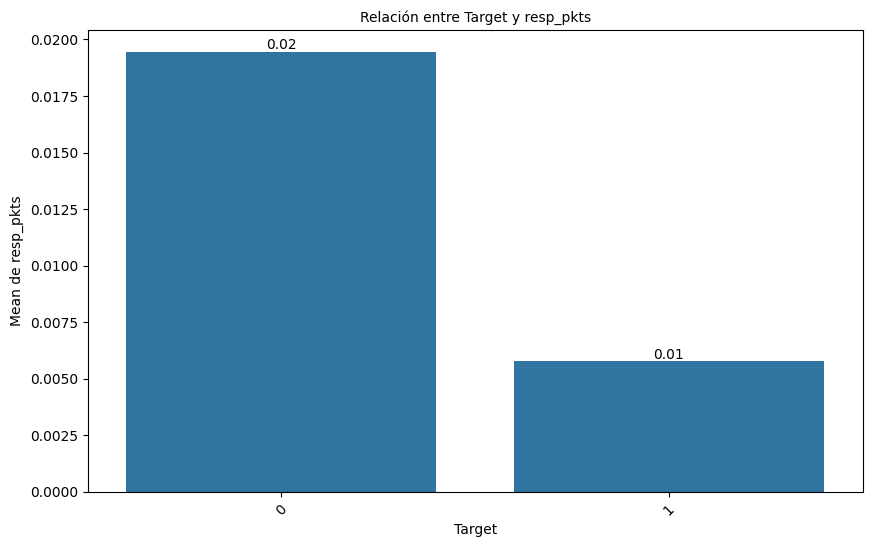

In [18]:
bt.plot_categorical_numerical_relationship(df, "Target", "resp_pkts", show_values=True, measure='mean')


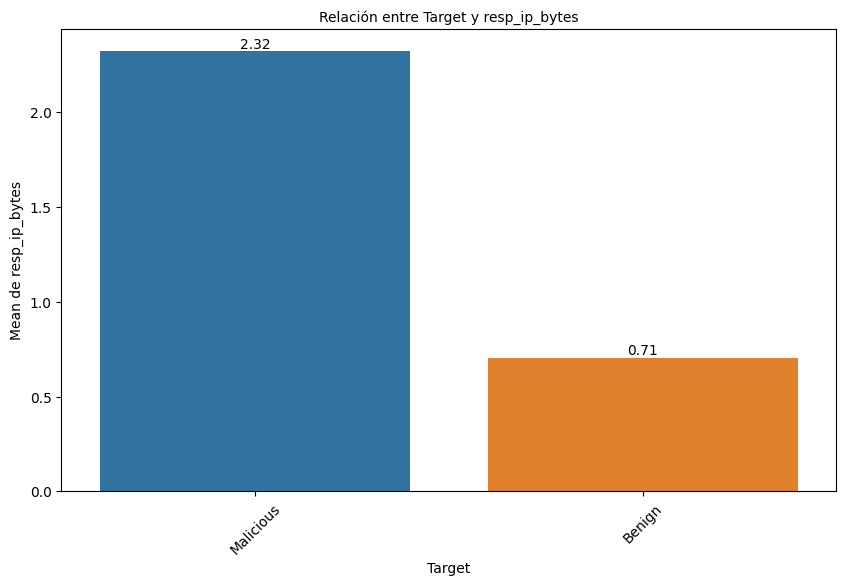

In [36]:
bt.plot_categorical_numerical_relationship(df, "Target", "resp_ip_bytes", show_values=True, measure='mean')

DE LAS VISUALICACIONES DE LAS VARIABLES OBSERVAMOS QUE EXISTEN DOS EXCESIVAMENTE BALANCEADAS PARA LA CLASE MAYORITARIA QUE SON: col=["ip.resp_p", "orig_ip_bytes"]

In [20]:
bt.plot_categorical_numerical_relationship(df, "Target", "history", show_values=True, measure='mean')

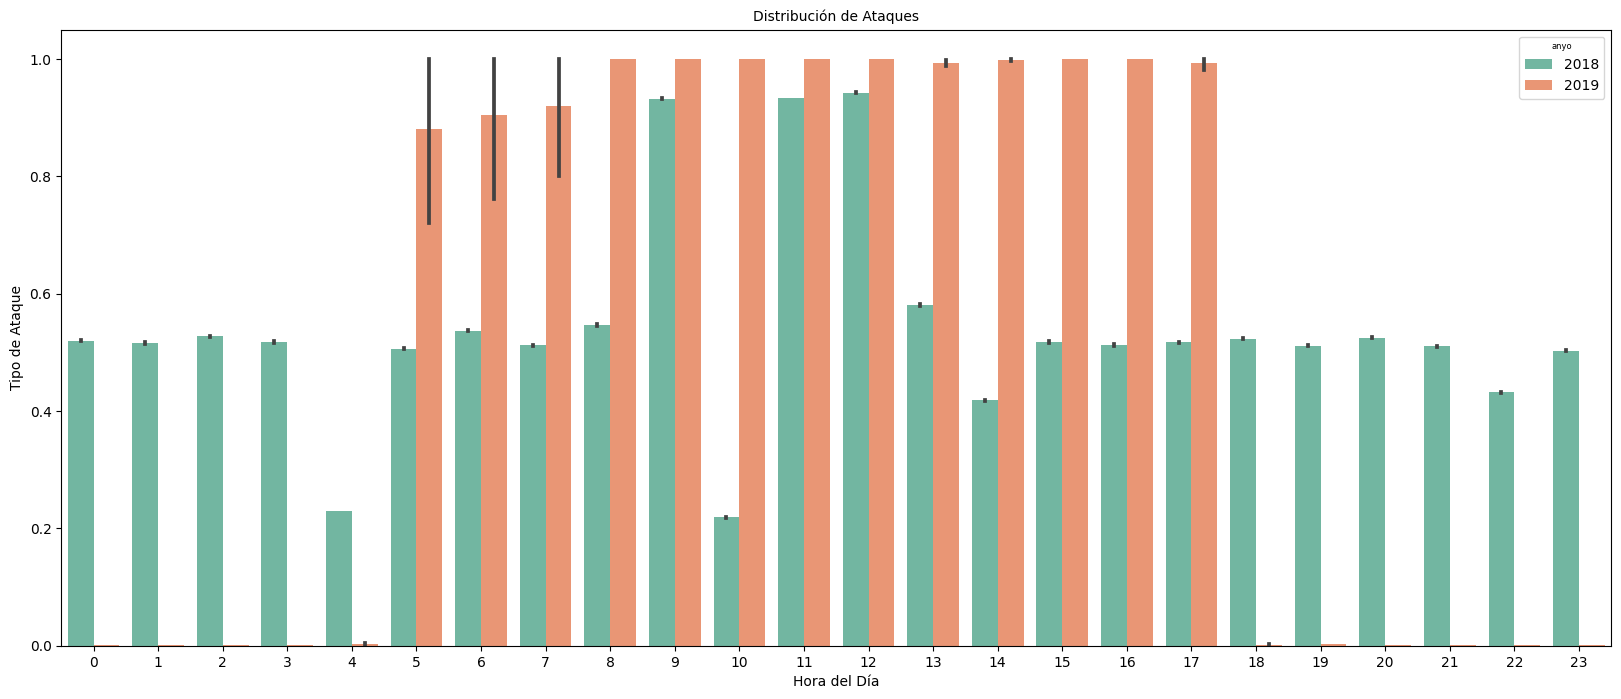

In [11]:

#Crear un bar plot para la distribución de ataques por horas en intervalos
plt.figure(figsize=(20, 8))
sns.barplot(x='mes', y='Target', hue='anyo', data=df, palette='Set2')
plt.title('Distribución de Ataques')
plt.xlabel('Hora del Día')
plt.ylabel('Tipo de Ataque')
plt.legend=False
plt.show()

MAPEO DE LA TARGET A 0 Y 1

In [35]:
#MAPEO LA TARGET
MAPPING={"Malicious": 0, "Benign": 1}

df["Target"].replace(MAPPING, inplace=True)

In [36]:
df.shape

(25011003, 16)

In [37]:
df.to_csv(r"D:\Cursos\REPOSITORIOS\DATASET\malware_total\df_malware_origen.csv", index=False)

CONTINUA EN NOTEBOOK MALWARE_1_2